In [112]:
import pandas as pd    ## for dataframes and related
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random as rd
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
import graphviz
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import LatentDirichletAllocation 
from sklearn.naive_bayes import MultinomialNB
import numpy as np


import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

from random import sample
from nltk.stem import PorterStemmer
from sklearn import preprocessing


In [113]:
dataset = pd.read_csv('droppedDF.csv')

In [114]:
dataset.head()

,Unnamed: 0,domain,title,selftext
0,0,explainlikeimfive,ELI5: What exactly is Obamacare and what did i...,I understand what medicare is and everything b...
1,1,explainlikeimfive,ELI5 has defaulted!,We were informed yesterday by the reddit admin...
2,2,explainlikeimfive,The Five-Year-Old's Guide to the Galaxy,Below is a hand-picked collection of outstandi...
3,3,explainlikeimfive,ELI67 Please explain like I'm 67 the differenc...,"I know this kind of breaks the rules, but I th..."
4,4,explainlikeimfive,"[META] Okay, this sub is slowly turning into /...",Questions here are supposed to be covering com...


In [115]:
set(dataset['domain'])

{'AskReddit',
 'GetMotivated',
 'IAmA',
 'Jokes',
 'LifeProTips',
 'Showerthoughts',
 'books',
 'explainlikeimfive',
 'food',
 'funny',
 'movies',
 nan,
 'pics',
 'todayilearned',
 'woahdude',
 'worldnews'}

In [116]:
#first only with selftext
Content_text = dataset['selftext']#.to_list()

In [117]:
type(Content_text[0])

str

In [118]:
import re

#clean the text
email_re = r"""(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""

# replace = [ (pattern-to-replace, replacement),  ...]
replace = [
    (r"<a[^>]*>(.*?)</a>", r"\1"),  # Matches most URLs
    (email_re, "email"),            # Matches emails
    (r"(?<=\d),(?=\d)", ""),        # Remove commas in numbers
    (r"\d+", "numbr"),              # Map digits to special token <numbr>
    (r"[\t\n\r\*\.\@\,\-\/]", " "),   # Punctuation and other junk
    (r"\s+", " ")                   # Stips extra whitespace
]

for repl in replace:
    text = [re.sub(repl[0], repl[1], str(text)) for text in Content_text]

In [119]:
Stemmer = PorterStemmer()
def My_Stemmer(str1):
    #delete ^letters
    words = re.sub(r'[^A-Za-z]'," ",str1).lower().split()
    words = [Stemmer.stem(word) for word in words] ##input is word not sentence
    return words

In [120]:
MyCount = CountVectorizer(stop_words='english',tokenizer=My_Stemmer,lowercase=True)

In [121]:
DTM1 = MyCount.fit_transform(Content_text.apply(lambda x: np.str_(x)))


/Users/nicole/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_w

In [122]:

##Convert DTM to DF
ColNames= MyCount.get_feature_names()


DF = pd.DataFrame(DTM1.toarray(),columns=ColNames)

In [123]:
DF.shape

(4358, 20991)

In [124]:
#le = preprocessing.LabelEncoder()
#dataset['domain'] = le.fit_transform(dataset['domain'].astype(str))
dataset['domain'] = dataset['domain'].astype(str)

In [125]:
dataset.head()

,Unnamed: 0,domain,title,selftext
0,0,explainlikeimfive,ELI5: What exactly is Obamacare and what did i...,I understand what medicare is and everything b...
1,1,explainlikeimfive,ELI5 has defaulted!,We were informed yesterday by the reddit admin...
2,2,explainlikeimfive,The Five-Year-Old's Guide to the Galaxy,Below is a hand-picked collection of outstandi...
3,3,explainlikeimfive,ELI67 Please explain like I'm 67 the differenc...,"I know this kind of breaks the rules, but I th..."
4,4,explainlikeimfive,"[META] Okay, this sub is slowly turning into /...",Questions here are supposed to be covering com...


In [126]:
DF['label'] = dataset['domain']

In [135]:
TrainDF,TestDF = train_test_split(DF,test_size=0.3)


In [136]:
Train_Label = TrainDF['label']
Test_Label = TestDF['label']
Trainset = TrainDF.drop(['label'],axis=1)
Testset = TestDF.drop(['label'],axis=1)

In [137]:
MyModelNB= MultinomialNB()

NB1=MyModelNB.fit(Trainset, Train_Label)
Prediction1 = MyModelNB.predict(Testset)




In [138]:
acc1 = accuracy_score(Test_Label,Prediction1) #accuracy is 0.5917
acc1


0.5856269113149847

In [139]:
f1 = f1_score(Test_Label,Prediction1,average='weighted')
f1

0.5365872286487705

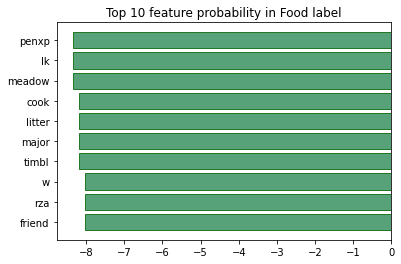

In [140]:
prob1 = NB1.feature_log_prob_[8, :] #food

indices = np.argsort(prob1)[::-1]
prob1 = prob1[indices] #feature importance
feature_names = ColNames
feature_names = [feature_names[index] for index in indices.tolist()] #feature name

plt.barh(feature_names[:10], prob1[:10],facecolor='seagreen',edgecolor='darkgreen',alpha=0.8)
plt.title('Top 10 feature probability in Food label')
plt.savefig('NB1.png')

In [141]:
set(Train_Label)

{'AskReddit',
 'GetMotivated',
 'IAmA',
 'Jokes',
 'LifeProTips',
 'Showerthoughts',
 'books',
 'explainlikeimfive',
 'food',
 'funny',
 'movies',
 'pics',
 'woahdude'}

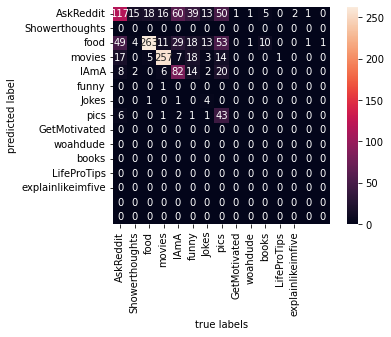

In [142]:
#confusion matrix
con_m1 = confusion_matrix(Test_Label,Prediction1)
sns.heatmap(con_m1.T, square = True, annot=True, fmt = "d", xticklabels=set(Train_Label),yticklabels=set(Train_Label))
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.savefig('confusion1.png')

In [192]:
#######second with title
Content_title = dataset['title']

In [193]:
type(Content_title[0])

str

In [194]:
DTM2 = MyCount.fit_transform(Content_title.apply(lambda x: np.str_(x)))
##Convert DTM to DF
ColNames= MyCount.get_feature_names()


DF2 = pd.DataFrame(DTM2.toarray(),columns=ColNames)

In [195]:
DF2['label'] = dataset['domain']

In [204]:
TrainDF2,TestDF2 = train_test_split(DF2,test_size=0.3)


In [205]:
Train_Label2 = TrainDF2['label']
Test_Label2 = TestDF2['label']
Trainset2 = TrainDF2.drop(['label'],axis=1)
Testset2 = TestDF2.drop(['label'],axis=1)

In [206]:
NB2=MyModelNB.fit(Trainset2, Train_Label2)
Prediction2 = MyModelNB.predict(Testset2)
Prediction2[0]

'Showerthoughts'

In [207]:
acc2 = accuracy_score(Test_Label2,Prediction2) #accuracy is 0.75
acc2

0.7744648318042814

In [208]:
f2 = f1_score(Test_Label2,Prediction2,average='weighted')
f2

0.7483067158253591

In [209]:
set(Train_Label2)

{'AskReddit',
 'GetMotivated',
 'IAmA',
 'Jokes',
 'LifeProTips',
 'Showerthoughts',
 'books',
 'explainlikeimfive',
 'food',
 'funny',
 'movies',
 'pics',
 'todayilearned',
 'woahdude',
 'worldnews'}

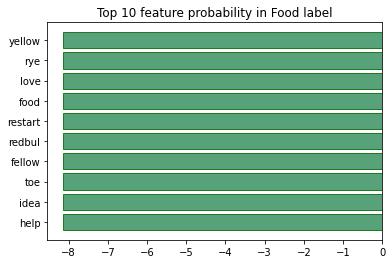

In [210]:
prob2 = NB2.feature_log_prob_[8, :] #food

indices = np.argsort(prob2)[::-1]
prob2 = prob2[indices] #feature importance
feature_names = ColNames
feature_names = [feature_names[index] for index in indices.tolist()] #feature name

plt.barh(feature_names[:10], prob2[:10],facecolor='seagreen',edgecolor='darkgreen',alpha=0.8)
plt.title('Top 10 feature probability in Food label')
plt.savefig('NB2.png')

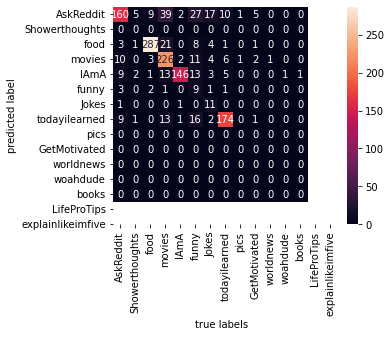

In [211]:
#confusion matrix
con_m2 = confusion_matrix(Test_Label2,Prediction2)
sns.heatmap(con_m2.T, square = True, annot=True, fmt = "d", xticklabels=set(Train_Label2),yticklabels=set(Train_Label2))
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.savefig('confusion2.png')

In [179]:
print("Accuracy: %.2f%%" % (acc1 * 100.0))

Accuracy: 58.56%
